In [ ]:
%matplotlib qt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from knn import KNN


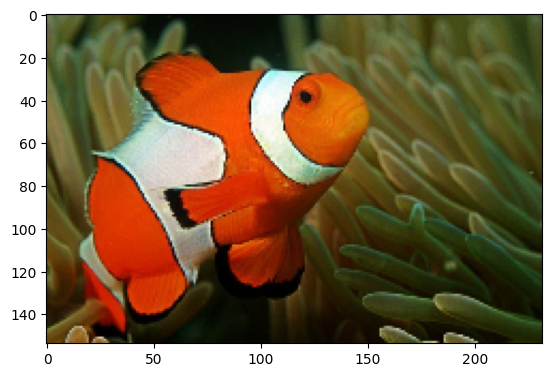

In [2]:
nemo = cv2.imread('input/nemo.jpg')
nemo = cv2.resize(nemo, (0, 0), fx=0.25, fy=0.25)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

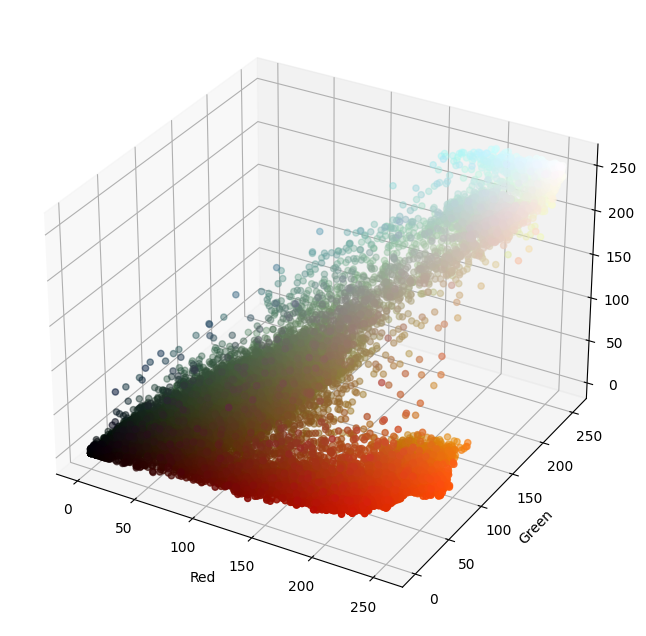

In [3]:
# create dataset from pixels
pixels_list_rgb = nemo.reshape(-1, 3) # column number is 3 and row numbers aren't decleared so insert -1
pixels_list_rgb.shape

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
 
# c=pixels_list / 255 = each pixels show as it's own color
ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb/255, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_label('Blue')
plt.show()

In [4]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
nemo.shape

(154, 232, 3)

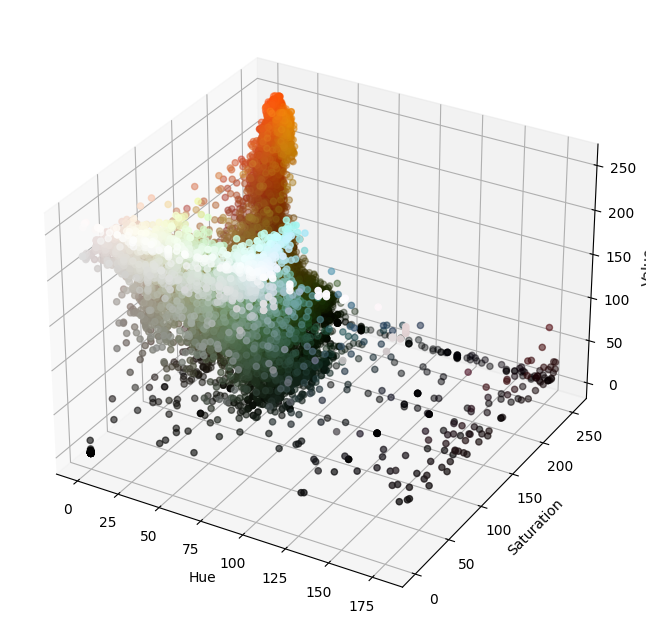

In [5]:
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection= '3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb/ 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

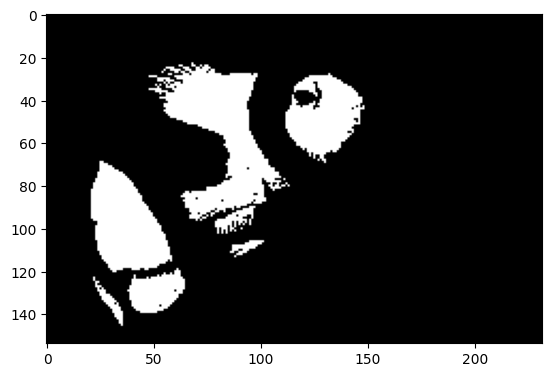

In [6]:
# select orange color range
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# create mask for orange parts
mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap= 'gray')
plt.show()

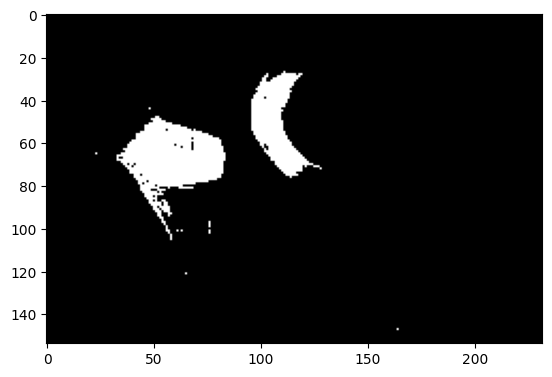

In [7]:
# create mask for white parts
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.show()

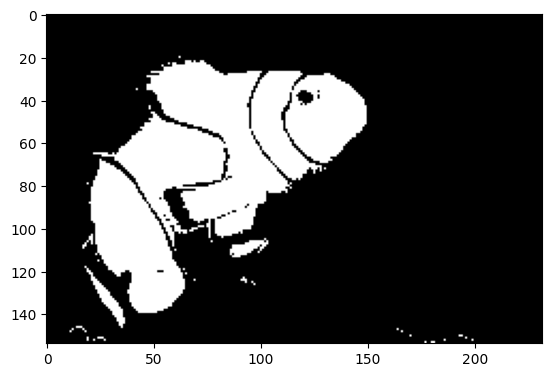

In [8]:
# create mask for black parts
light_blacks = (0, 0, 0)
dark_blacks = (350, 290, 180)
black_mask = cv2.inRange(nemo_hsv ,light_blacks , dark_blacks )
black_mask = cv2.bitwise_not(black_mask)
plt.imshow(black_mask, cmap='gray')

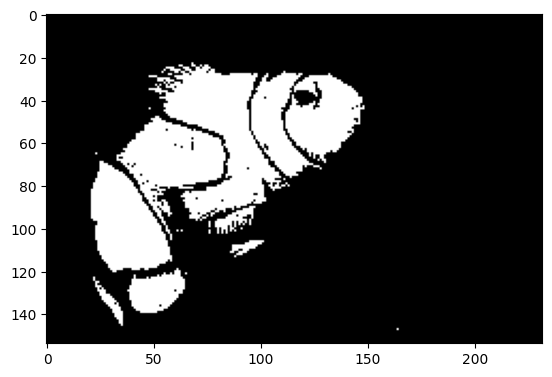

In [9]:
final_mask = mask_orange + mask_white
plt.imshow(final_mask, cmap='gray')
plt.show()

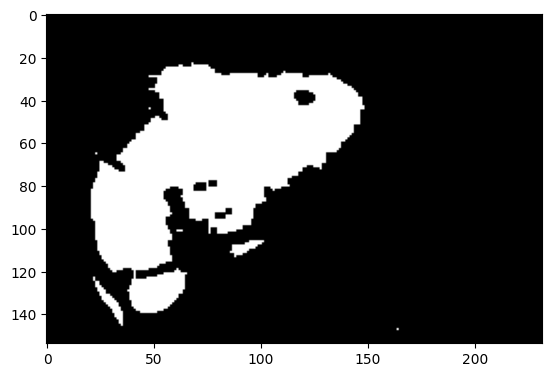

In [10]:
kernel = np.ones((3, 3), np.uint8)
image = cv2.dilate(final_mask, kernel, cv2.BORDER_TRANSPARENT)
image = cv2.erode(image, kernel, cv2.BORDER_TRANSPARENT)

plt.imshow(image, cmap='gray')

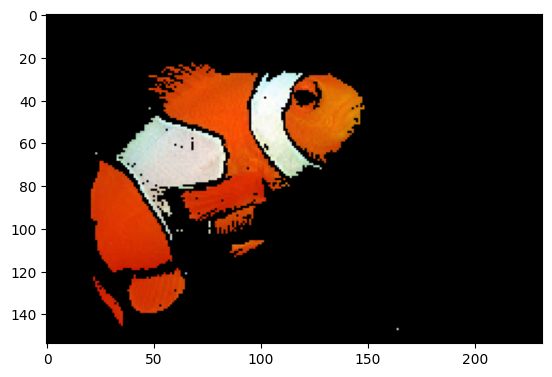

In [11]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.show()

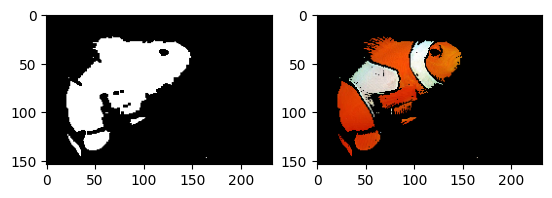

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [13]:
# Training
# pixels_list_hsv is consider as train dataset

#normalize dataset 
X_train = pixels_list_hsv / 255
X_train.shape

(35728, 3)

In [14]:
#consider final mask as labels, nemo pixels as 1 label and image background as 0 label
final_mask.shape

# this not like a dataset so reshape it

(154, 232)

In [16]:

Y_train = final_mask.reshape(-1,) //255
Y_train.shape

(35728,)

In [17]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

In [18]:
new_pixel= np.array([10, 20, 255]) // 255
knn.predict([new_pixel])

[1]

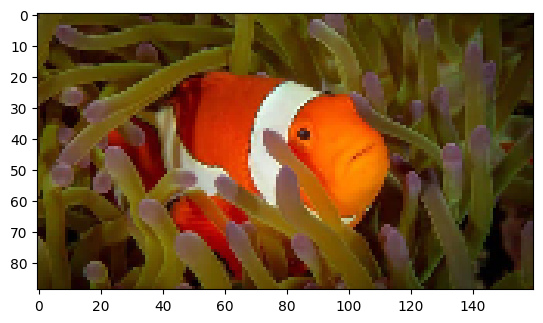

In [19]:
# prediction for new images

dashe_nemo= cv2.imread('input\dash_nemo.jpg')
dashe_nemo= cv2.resize(dashe_nemo, (0, 0), fx=0.25, fy=0.25)
dashe_nemo = cv2.cvtColor(dashe_nemo, cv2.COLOR_BGR2RGB)
plt.imshow(dashe_nemo)
plt.show()

In [20]:
dashe_nemo_hsv = cv2.cvtColor(dashe_nemo, cv2.COLOR_RGB2HSV)
dashe_nemo_hsv.shape

(89, 160, 3)

In [25]:
X_test = dashe_nemo_hsv.reshape(-1, 3) / 255
X_test = np.array(X_test)
X_test.shape

(14240, 3)

In [ ]:
Y_pred = knn.predict(X_test)

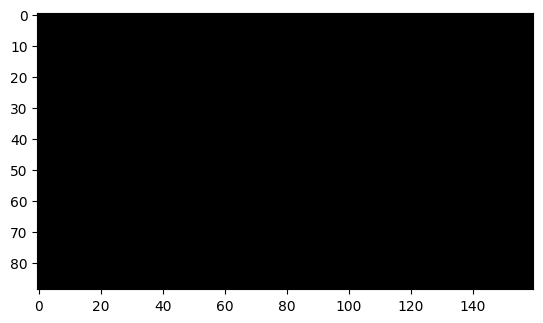

In [29]:
Y_pred = np.array(Y_pred)
output = Y_pred.reshape(dashe_nemo_hsv.shape[:2])
plt.imshow(output, cmap= 'gray')
plt.show()

In [ ]:
output = output.astype('uint8')
final_result = cv2.bitwise_and(dashe_nemo, dashe_nemo, mask=output)
plt.imshow(final_result, cmap='gray')

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(dashe_nemo, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(output, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.show()

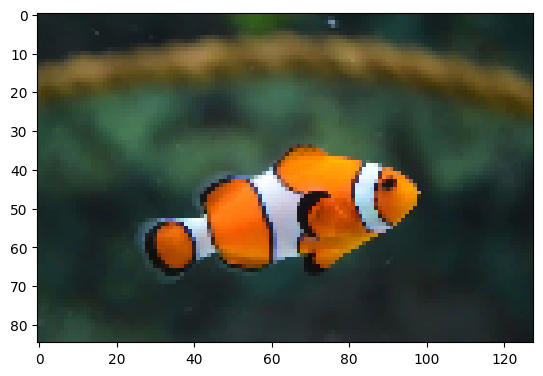

In [34]:
# Prediction for nemo's sister

abjie_nemo = cv2.imread('input/abji_nemo.jpg')
abjie_nemo= cv2.resize(abjie_nemo, (0, 0), fx=0.1, fy=0.1)
abjie_nemo= cv2.cvtColor(abjie_nemo, cv2.COLOR_BGR2RGB)
plt.imshow(abjie_nemo)
plt.show()

In [39]:
abjie_nemo_hsv = cv2.cvtColor(abjie_nemo, cv2.COLOR_RGB2HSV)

In [83]:
X_test = abjie_nemo_hsv.reshape(-1, 3) // 255
X_test = np.array(X_test)

In [84]:
Y_pred = knn.predict(X_test)

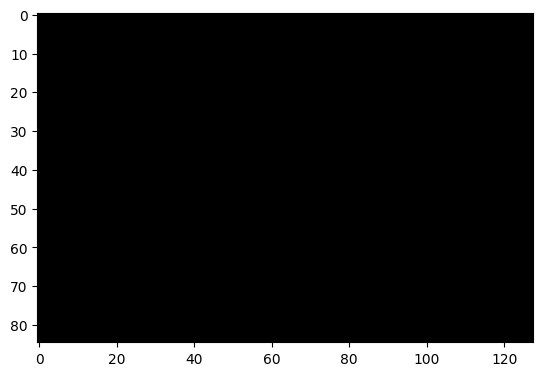

In [85]:
Y_pred_sis = np.array(Y_pred_sis)
output = Y_pred_sis.reshape(abjie_nemo_hsv.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

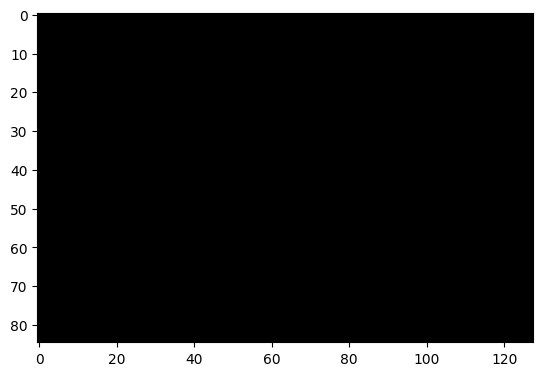

In [86]:
output = output.astype('uint8')
final_result = cv2.bitwise_and(abjie_nemo, abjie_nemo, mask=output)
plt.imshow(final_result)
plt.show()

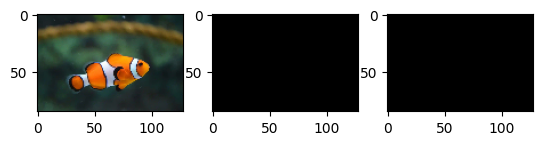

In [89]:
plt.subplot(1, 3, 1)
plt.imshow(abjie_nemo, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.show()